#Defining and Combining the Two DataFrames:

In [4]:
import pandas as pd
df = pd.read_json('dim_customer.json')
df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [5]:
import pandas as pd
df2 = pd.read_csv('fct_invoice.csv')
df2

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [6]:
updated_df = df.rename(columns={'id': 'customer_id'})
updated_df

,age,first_name,gender,customer_id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [7]:
complete_df = pd.merge(updated_df, df2, on='customer_id', how='inner')
complete_df

,age,first_name,gender,customer_id,last_name,invoice_no,category,quantity,price,payment_method,invoice_date,shopping_mall
0,48.0,Nicholas,M,0,Flores,I254078,Shoes,3,1800.51,Cash,28/05/2021,Kanyon
1,48.0,Nicholas,M,0,Flores,I387354,Shoes,1,600.17,Cash,7/4/2021,Kanyon
2,48.0,Nicholas,M,0,Flores,I170558,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM
3,48.0,Nicholas,M,0,Flores,I187874,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul
4,48.0,Nicholas,M,0,Flores,I171870,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,Cosmetics,5,203.30,Debit Card,4/7/2021,Mall of Istanbul
99453,NaN,David,M,9494,Roy,I203211,Cosmetics,1,40.66,Debit Card,9/7/2022,Metrocity
99454,85.0,Thomas,M,10350,Turner,I325731,Cosmetics,2,81.32,Cash,7/4/2021,Cevahir AVM
99455,NaN,April,F,10587,Sanchez,I478078,Clothing,5,1500.40,Credit Card,20/10/2022,Metrocity


Easy: How many unique customers are in the dataset?

In [19]:
unique_names = complete_df['first_name'].nunique()
print(f"Number of unique names: {unique_names}.")

Number of unique names: 597.


Easy: What are the different categories of products available? How many unique categories are there?

In [12]:
unique_cats = complete_df['category'].nunique()
unique_list = complete_df['category'].unique()

print(f"Number of unique categories: {unique_cats}. List of categories: {unique_list}.")

Number of unique categories: 8. List of categories: ['Shoes' 'Cosmetics' 'Books' 'Toys' 'Clothing' 'Food & Beverage'
 'Technology' 'Souvenir'].


Easy: Which payment method is the most popular? How many times was it used?


In [23]:
payment_count = complete_df['payment_method'].value_counts()
popular_payment = payment_count.index[0]
popular_count = payment_count.iloc[0]

print(f"Most popular method: {popular_payment}. Amount of times used: {popular_count}.")

Most popular method: Cash. Amount of times used: 44447.


Medium: What are the three most popular categories, by total sales?

In [10]:
complete_df['sales'] = complete_df['quantity'] * complete_df['price']
catsales_series = complete_df.groupby('category')['sales'].sum()
descending_catsales = catsales_series.sort_values(ascending=False)

print(descending_catsales.head(3))

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


Medium: What are the total sales attributed to customers over the age of 45?


In [8]:
over45 = complete_df[complete_df['age']>45]
over45_df = pd.DataFrame(over45)
over45_df = over45_df[over45_df['quantity'].notnull()]
over45_df = over45_df[over45_df['price'].notnull()]
over45_sum = (over45_df['quantity'] * over45_df['price']).sum()

print(f"Total sales attributed to customers over 45 years of age: {over45_sum}.")

Total sales attributed to customers over 45 years of age: 82039768.14999999.


Medium: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

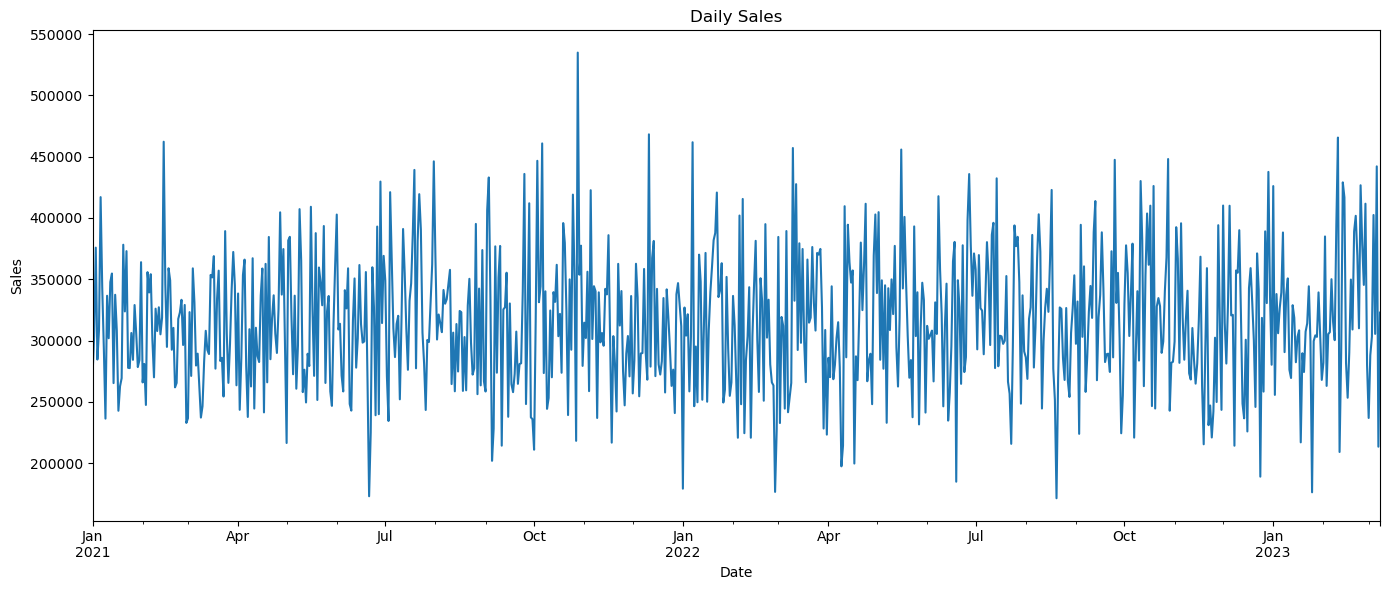

In [22]:
import matplotlib.pyplot as plt

complete_df['invoice_date'] = pd.to_datetime(complete_df['invoice_date'], dayfirst=True)
complete_df['sales'] = (complete_df['price'] * complete_df['quantity'])
data = complete_df.groupby('invoice_date')['sales'].sum()

plt.figure(figsize=(14, 6))
data.plot()
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

Hard:
Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [18]:
complete_df['sales'] = (complete_df['price'] * complete_df['quantity'])
complete_df['decade'] = (complete_df['age'] // 10) * 10
complete_df['decade'] = complete_df['decade'].astype(str) + '-' + (complete_df['decade'] + 9).astype(str)
pd.set_option("display.float_format", "{:,.2f}".format)
complete_df.pivot_table(values="sales", index="category", columns="decade", aggfunc="sum")

decade,10.0-19.0,20.0-29.0,30.0-39.0,40.0-49.0,50.0-59.0,60.0-69.0,70.0-79.0,80.0-89.0,nan-nan
category,,,,,,,,,
Books,"12,801.75","79,461.75","84,143.10","87,203.40","74,962.20","80,476.80","54,827.85","26,664.00","334,012.05"
Clothing,"1,927,413.84","10,250,732.80","11,354,126.96","11,215,189.92","10,321,851.76","10,660,642.08","7,769,371.28","4,493,698.00","46,003,764.40"
Cosmetics,"109,619.36","605,915.32","723,544.70","665,034.96","587,780.96","649,990.76","419,082.62","254,531.60","2,777,362.62"
Food & Beverage,"13,582.31","73,491.96","87,246.86","89,553.29","72,425.04","80,976.09","55,050.98","31,332.93","345,875.59"
Shoes,"993,281.35","5,924,878.24","7,200,839.66","7,025,590.02","5,852,857.84","5,978,893.54","4,480,269.05","2,628,744.60","26,468,097.17"
Souvenir,"12,375.15","54,943.32","64,092.72","66,391.80","54,943.32","55,025.43","38,673.81","23,718.06","265,661.04"
Technology,"1,129,800.00","5,261,550.00","6,159,300.00","5,954,550.00","4,435,200.00","5,471,550.00","3,638,250.00","1,946,700.00","23,865,450.00"
Toys,"60,426.24","385,100.80","420,582.40","390,906.88","345,067.52","363,955.20","273,244.16","153,932.80","1,587,210.24"
